# Compare Solutions - Homogenous (Eurus)

Brendan Smithyman | October 2015

This notebook shows comparisons between the responses of the different solvers.

In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from anemoi import Eurus, SimpleSource, StackedSimpleSource, AnalyticalHelmholtz

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
matplotlib.rcParams['savefig.dpi'] = 150 # Change this to adjust figure size

In [4]:
dx = 1.
dz = 1.
nx = 100
nz = 200
velocity    = 2000.
density     = 1.

# Anisotropy parameters
angle       = 0
theta       = (np.pi/180) * angle
epsilon     = 0.2
delta       = 0.2
nPML        = 10
freeSurf    = [False, False, False, False]
        
systemConfig = {
        'c':        velocity,  # m/s
        'rho':      density,     # kg/m^3
        'freq':     100.,    # Hz
        'nx':       nx,
        'nz':       nz,
        'dx':       dx,
        'dz':       dz,
        'theta':    theta,
        'eps':      epsilon,
        'delta':    delta,
        'nPML':     nPML,
        'cPML':     1e3,
        'freeSurf': freeSurf,
}

In [5]:
Ainv = Eurus(systemConfig)
AH = AnalyticalHelmholtz(systemConfig)
SS = StackedSimpleSource(systemConfig)
#SS = SimpleSource(systemConfig)

xs, zs = 50, 100
q = SS(xs, zs)
#q = np.hstack([q.T.ravel() / q.sum(), np.zeros(nx*nz, dtype=np.complex128)])
uMZ = Ainv*q
uAH = AH(xs, zs)

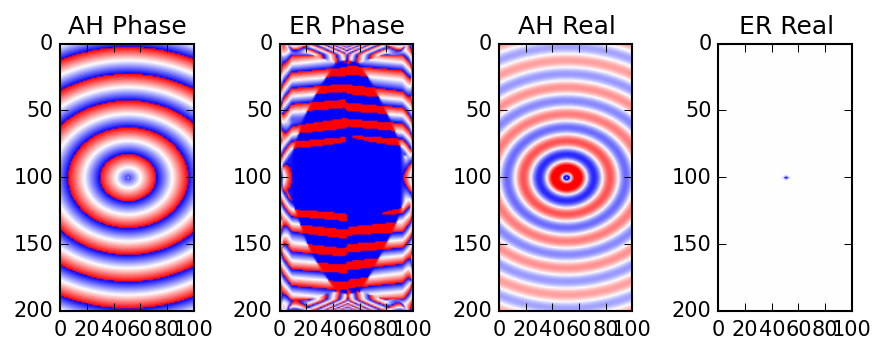

In [6]:
clip = 0.1

plotopts = {
    'vmin':     -np.pi,
    'vmax':     np.pi,
    'extent':   [0., dx * nx, dz * nz, 0.],
    'cmap':     cm.bwr,                
}

fig = plt.figure()

ax1 = fig.add_subplot(1,4,1)
plt.imshow(np.angle(uAH.reshape((nz, nx))), **plotopts)
plt.title('AH Phase')

ax2 = fig.add_subplot(1,4,2)
plt.imshow(np.angle(uMZ[:nx*nz].reshape((nz,nx))), **plotopts)
plt.title('ER Phase')

plotopts.update({
    'vmin':     -clip,
    'vmax':     clip,
})

ax3 = fig.add_subplot(1,4,3)
plt.imshow(uAH.reshape((nz, nx)).real, **plotopts)
plt.title('AH Real')

ax4 = fig.add_subplot(1,4,4)
plt.imshow(uMZ[:nx*nz].reshape((nz, nx)).real, **plotopts)
plt.title('ER Real')

fig.tight_layout()

## Error plots for MiniZephyr vs. the AnalyticalHelmholtz response

Response of the field (showing where the numerical case does not match the analytical case):

- Source region
- PML regions

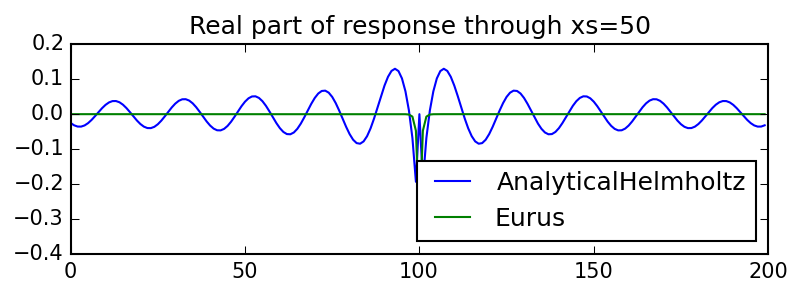

In [7]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1, aspect=100)

plt.plot(uAH.real.reshape((nz, nx))[:,xs], label='AnalyticalHelmholtz')
plt.plot(uMZ[:nx*nz].real.reshape((nz, nx))[:,xs], label='Eurus')
plt.legend(loc=4)
plt.title('Real part of response through xs=%d'%xs)

### Relative error of the MiniZephyr solution (in %)

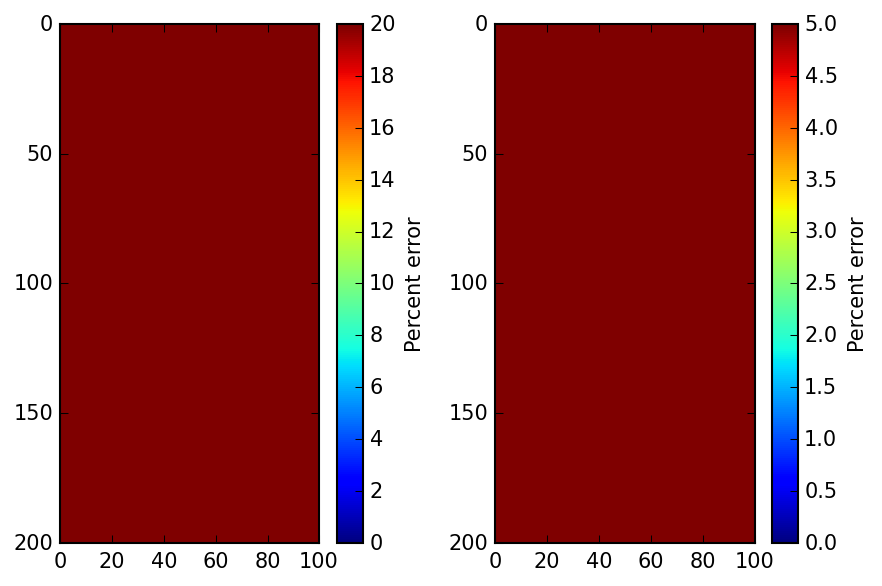

In [8]:
uMZr = uMZ[:nx*nz].reshape((nz, nx))
uAHr = uAH.reshape((nz, nx))

plotopts.update({
    'cmap': cm.jet,
    'vmin': 0.,
    'vmax': 20.,
})

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
plt.imshow(abs(uAHr - uMZr)/(abs(uAHr)+1e-15) * 100, **plotopts)
cb = plt.colorbar()
cb.set_label('Percent error')

plotopts.update({'vmax': 5.})

ax2 = fig.add_subplot(1,2,2)
plt.imshow(abs(uAHr - uMZr)/(abs(uAHr)+1e-15) * 100, **plotopts)
cb = plt.colorbar()
cb.set_label('Percent error')

fig.tight_layout()